In [125]:
import h5py
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import glob, os
import datetime as dt
import cv2
from scipy.signal import find_peaks, peak_prominences
import ffmpeg
import subprocess

FileNotFoundError: [Errno 2] No such file or directory: '/home/ml/Documents/video+velocity_br/000.png'

<Figure size 1440x720 with 0 Axes>

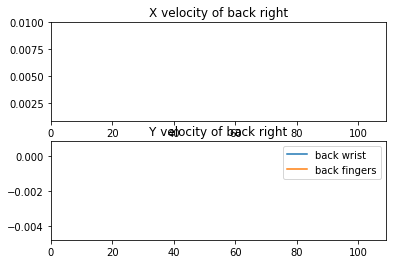

In [126]:
f = "/home/ml/Documents/Not_TADSS_Videos/MC30/cut/dlc_output_16-810/MC30_12-02-2019_R1_crossing1_patternA_light2DLC_resnet101_LadderWalkFeb13shuffle1_1030000.h5"
df = pd.read_hdf(f)
name=f.split("/")[8]
if len(name.split("_")) == 9:
    run = name.split("_")[2]
else:
    run = name.split("_")[3]
#split by limb
#frontright
df_frw = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['right wrist']
df_frf = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['right fingers']
df_fre = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['right elbow']
#frontleft
df_flw = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['left wrist']
df_flf = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['left fingers']
df_fle = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['left elbow']
#backright
df_bra = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['right ankle']
df_brt = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['right toes']
#frontleft
df_bla = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['left ankle']
df_blt = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['left toes']

#filter by likelihood 

likelihood_threshold = 0.1

df_frw.loc[df_frw['likelihood']<likelihood_threshold] = np.nan
df_frf.loc[df_frf['likelihood']<likelihood_threshold] = np.nan
df_fre.loc[df_fre['likelihood']<likelihood_threshold] = np.nan
#frontleft
df_flw.loc[df_flw['likelihood']<likelihood_threshold] = np.nan
df_flw.loc[df_flf['likelihood']<likelihood_threshold] = np.nan
df_fle.loc[df_fle['likelihood']<likelihood_threshold] = np.nan
#backright
df_bra.loc[df_bra['likelihood']<likelihood_threshold] = np.nan
df_brt.loc[df_brt['likelihood']<likelihood_threshold] = np.nan
#frontleft
df_bla.loc[df_bla['likelihood']<likelihood_threshold] = np.nan
df_blt.loc[df_blt['likelihood']<likelihood_threshold] = np.nan

#forward fill
#front right
df_frw = df_frw.ffill()
df_frf = df_frf.ffill()
df_fre = df_fre.ffill()
#frontleft
df_flw = df_flw.ffill()
df_flf = df_flw.ffill()
df_fle = df_fle.ffill()
#backright
df_bra = df_bra.ffill()
df_brt = df_brt.ffill()
#frontleft
df_bla = df_bla.ffill()
df_blt = df_blt.ffill()

#reset_index
#front right
df_frw = df_frw.reset_index(drop=True)
df_frf = df_frf.reset_index(drop=True)
df_fre = df_fre.reset_index(drop=True)
#frontleft
df_flw = df_flw.reset_index(drop=True)
df_flf = df_flw.reset_index(drop=True)
df_fle = df_fle.reset_index(drop=True)
#backright
df_bra = df_bra.reset_index(drop=True)
df_brt = df_brt.reset_index(drop=True)
#frontleft
df_bla = df_bla.reset_index(drop=True)
df_blt = df_blt.reset_index(drop=True)

#find + and - peaks for all limbs. 

#front right x
if list(run)[0]=='L':
    forward_frw_x = find_peaks(-1*np.gradient(df_frw['x']),height=20,distance=5)
    backward_frw_x = find_peaks(np.gradient(df_frw['x']),height=20,distance=5)
else:
    forward_frw_x = find_peaks(np.gradient(df_frw['x']),height=20,distance=5)
    backward_frw_x = find_peaks(-1*np.gradient(df_frw['x']),height=20,distance=5)
forwardlist_frw_x = forward_frw_x[0]
backwardlist_frw_x = backward_frw_x[0]

if list(run)[0]=='L':
    forward_frf_x = find_peaks(-1*np.gradient(df_frf['x']),height=20,distance=5)
    backward_frf_x = find_peaks(np.gradient(df_frf['x']),height=20,distance=5)
else:
    forward_frf_x = find_peaks(np.gradient(df_frf['x']),height=20,distance=5)
    backward_frf_x = find_peaks(-1*np.gradient(df_frf['x']),height=20,distance=5)
forwardlist_frf_x = forward_frf_x[0]
backwardlist_frf_x = backward_frf_x[0]

#front right y
up_frw_y = find_peaks(-1*np.gradient(df_frw['y']),height=5,distance=5)
down_frw_y = find_peaks(np.gradient(df_frw['y']),height=5,distance=5)
uplist_frw_y = up_frw_y[0]
downlist_frw_y = down_frw_y[0]

up_frf_y = find_peaks(-1*np.gradient(df_frf['y']),height=5,distance=5)
down_frf_y = find_peaks(np.gradient(df_frf['y']),height=5,distance=5)
uplist_frf_y = up_frf_y[0]
downlist_frf_y = down_frf_y[0]

    #front left x
if list(run)[0]=='L':
    forward_flw_x = find_peaks(-1*np.gradient(df_flw['x']),height=20,distance=5)
    backward_flw_x = find_peaks(np.gradient(df_flw['x']),height=20,distance=5)
else:
    forward_flw_x = find_peaks(np.gradient(df_flw['x']),height=20,distance=5)
    backward_flw_x = find_peaks(-1*np.gradient(df_flw['x']),height=20,distance=5)
forwardlist_flw_x = forward_flw_x[0]
backwardlist_flw_x = backward_flw_x[0]

if list(run)[0]=='L':
    forward_flf_x = find_peaks(-1*np.gradient(df_flf['x']),height=20,distance=5)
    backward_flf_x = find_peaks(np.gradient(df_flf['x']),height=20,distance=5)
else:
    forward_flf_x = find_peaks(np.gradient(df_flf['x']),height=20,distance=5)
    backward_flf_x = find_peaks(-1*np.gradient(df_flf['x']),height=20,distance=5)
forwardlist_flf_x = forward_flf_x[0]
backwardlist_flf_x = backward_flf_x[0]

#front left y
up_flw_y = find_peaks(-1*np.gradient(df_flw['y']),height=5,distance=5)
down_flw_y = find_peaks(np.gradient(df_flw['y']),height=5,distance=5)
uplist_flw_y = up_flw_y[0]
downlist_flw_y = down_flw_y[0]

up_flf_y = find_peaks(-1*np.gradient(df_flf['y']),height=5,distance=5)
down_flf_y = find_peaks(np.gradient(df_flf['y']),height=5,distance=5)
uplist_flf_y = up_flf_y[0]
downlist_flf_y = down_flf_y[0]

# back right x
if list(run)[0]=='L':
    forward_bra_x = find_peaks(-1*np.gradient(df_bra['x']),height=20,distance=5)
    backward_bra_x = find_peaks(np.gradient(df_bra['x']),height=20,distance=5)
else:
    forward_bra_x = find_peaks(np.gradient(df_bra['x']),height=20,distance=5)
    backward_bra_x = find_peaks(-1*np.gradient(df_bra['x']),height=20,distance=5)
forwardlist_bra_x = forward_bra_x[0]
backwardlist_bra_x = backward_bra_x[0]

if list(run)[0]=='L':
    forward_brt_x = find_peaks(-1*np.gradient(df_brt['x']),height=20,distance=5)
    backward_brt_x = find_peaks(np.gradient(df_brt['x']),height=20,distance=5)
else:
    forward_brt_x = find_peaks(np.gradient(df_brt['x']),height=20,distance=5)
    backward_brt_x = find_peaks(-1*np.gradient(df_brt['x']),height=20,distance=5)
forwardlist_brt_x = forward_brt_x[0]
backwardlist_brt_x = backward_brt_x[0]

#back right y
up_bra_y = find_peaks(-1*np.gradient(df_bra['y']),height=5,distance=5)
down_bra_y = find_peaks(np.gradient(df_bra['y']),height=5,distance=5)
uplist_bra_y = up_bra_y[0]
downlist_bra_y = down_bra_y[0]

up_brt_y = find_peaks(-1*np.gradient(df_brt['y']),height=5,distance=5)
down_brt_y = find_peaks(np.gradient(df_brt['y']),height=5,distance=5)
uplist_brt_y = up_brt_y[0]
downlist_brt_y = down_brt_y[0]

#back left x
if list(run)[0]=='L':
    forward_bla_x = find_peaks(-1*np.gradient(df_bla['x']),height=20,distance=5)
    backward_bla_x = find_peaks(np.gradient(df_bla['x']),height=20,distance=5)
else:
    forward_bla_x = find_peaks(np.gradient(df_bla['x']),height=20,distance=5)
    backward_bla_x = find_peaks(-1*np.gradient(df_bla['x']),height=20,distance=5)
forwardlist_bla_x = forward_bla_x[0]
backwardlist_bla_x = backward_bla_x[0]

if list(run)[0]=='L':
    forward_blt_x = find_peaks(-1*np.gradient(df_blt['x']),height=20,distance=5)
    backward_blt_x = find_peaks(np.gradient(df_blt['x']),height=20,distance=5)
else:
    forward_blt_x = find_peaks(np.gradient(df_blt['x']),height=20,distance=5)
    backward_blt_x = find_peaks(-1*np.gradient(df_blt['x']),height=20,distance=5)
forwardlist_blt_x = forward_blt_x[0]
backwardlist_blt_x = backward_blt_x[0]

#back left y
up_bla_y = find_peaks(-1*np.gradient(df_bla['y']),height=5,distance=5)
down_bla_y = find_peaks(np.gradient(df_bla['y']),height=5,distance=5)
uplist_bla_y = up_bla_y[0]
downlist_bla_y = down_bla_y[0]

up_blt_y = find_peaks(-1*np.gradient(df_blt['y']),height=5,distance=5)
down_blt_y = find_peaks(np.gradient(df_blt['y']),height=5,distance=5)
uplist_blt_y = up_blt_y[0]
downlist_blt_y = down_blt_y[0]


#plot

cap = cv2.VideoCapture("/home/ml/Documents/Not_TADSS_Videos/MC30/cut/dlc_output_16-810/MC30_12-02-2019_R1_crossing1_patternA_light2DLC_resnet101_LadderWalkFeb13shuffle1_1030000_labeled.mp4")
frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
width  = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

for i in range(frames):
    plt.close()
    plt.figure(figsize=(20,10))
    fig,(ax1,ax2) = plt.subplots(2)
    ax1.plot(np.gradient(df_bra['x'])[list(range(i+1))],label="back wrist")
    ax1.plot(np.gradient(df_brt['x'])[list(range(i+1))],label="back fingers")
    ax1.set_title("X velocity of back right")
    ax2.plot(np.gradient(df_bra['y'])[list(range(i+1))],label="back wrist")
    ax2.plot(np.gradient(df_brt['y'])[list(range(i+1))],label="back fingers")
    ax2.set_title("Y velocity of back right")
    plt.legend()
    ax1.set_xlim(0,frames)
    ax2.set_xlim(0,frames)
    plt.savefig("/home/ml/Documents/video+velocity_br/"+str(i).zfill(3)+".png")

In [137]:
#x and y velocity vs frame
videolist = glob.glob("/home/ml/Documents/Not_TADSS_Videos/MC30/cut/dlc_output_16-810/MC30_11-6-2019_R4_*.h5")+glob.glob("/home/ml/Documents/Not_TADSS_Videos/MC30/cut/dlc_output_16-810/MC30_12-02-2019_R1_*.h5")+glob.glob("/home/ml/Documents/Not_TADSS_Videos/MC30/cut/dlc_output_16-810/MC30_12-02-2019_R3_*.h5")+glob.glob("/home/ml/Documents/Not_TADSS_Videos/MC30/cut/dlc_output_16-810/MC30_12-04-2019_R3_*.h5")+glob.glob("/home/ml/Documents/Not_TADSS_Videos/MC30/cut/dlc_output_16-810/MC30_12-03-2019_R2_*.h5")
for f in videolist:
    df = pd.read_hdf(f)
    name=f.split("/")[8]
    if len(name.split("_")) == 9:
        run = name.split("_")[2]
    else:
        run = name.split("_")[3]
    #split by limb
    #frontright
    df_frw = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['right wrist']
    df_frf = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['right fingers']
    df_fre = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['right elbow']
    #frontleft
    df_flw = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['left wrist']
    df_flf = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['left fingers']
    df_fle = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['left elbow']
    #backright
    df_bra = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['right ankle']
    df_brt = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['right toes']
    #frontleft
    df_bla = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['left ankle']
    df_blt = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['left toes']

    #filter by likelihood 

    likelihood_threshold = 0.1

    df_frw.loc[df_frw['likelihood']<likelihood_threshold] = np.nan
    df_frf.loc[df_frf['likelihood']<likelihood_threshold] = np.nan
    df_fre.loc[df_fre['likelihood']<likelihood_threshold] = np.nan
    #frontleft
    df_flw.loc[df_flw['likelihood']<likelihood_threshold] = np.nan
    df_flw.loc[df_flf['likelihood']<likelihood_threshold] = np.nan
    df_fle.loc[df_fle['likelihood']<likelihood_threshold] = np.nan
    #backright
    df_bra.loc[df_bra['likelihood']<likelihood_threshold] = np.nan
    df_brt.loc[df_brt['likelihood']<likelihood_threshold] = np.nan
    #frontleft
    df_bla.loc[df_bla['likelihood']<likelihood_threshold] = np.nan
    df_blt.loc[df_blt['likelihood']<likelihood_threshold] = np.nan

    #forward fill
    #front right
    df_frw = df_frw.ffill()
    df_frf = df_frf.ffill()
    df_fre = df_fre.ffill()
    #frontleft
    df_flw = df_flw.ffill()
    df_flf = df_flw.ffill()
    df_fle = df_fle.ffill()
    #backright
    df_bra = df_bra.ffill()
    df_brt = df_brt.ffill()
    #frontleft
    df_bla = df_bla.ffill()
    df_blt = df_blt.ffill()

    #reset_index
    #front right
    df_frw = df_frw.reset_index(drop=True)
    df_frf = df_frf.reset_index(drop=True)
    df_fre = df_fre.reset_index(drop=True)
    #frontleft
    df_flw = df_flw.reset_index(drop=True)
    df_flf = df_flw.reset_index(drop=True)
    df_fle = df_fle.reset_index(drop=True)
    #backright
    df_bra = df_bra.reset_index(drop=True)
    df_brt = df_brt.reset_index(drop=True)
    #frontleft
    df_bla = df_bla.reset_index(drop=True)
    df_blt = df_blt.reset_index(drop=True)

    #find + and - peaks for all limbs. 

    #front right x
    if list(run)[0]=='L':
        forward_frw_x = find_peaks(-1*np.gradient(df_frw['x']),height=20,distance=5)
        backward_frw_x = find_peaks(np.gradient(df_frw['x']),height=20,distance=5)
    else:
        forward_frw_x = find_peaks(np.gradient(df_frw['x']),height=20,distance=5)
        backward_frw_x = find_peaks(-1*np.gradient(df_frw['x']),height=20,distance=5)
    forwardlist_frw_x = forward_frw_x[0]
    backwardlist_frw_x = backward_frw_x[0]

    if list(run)[0]=='L':
        forward_frf_x = find_peaks(-1*np.gradient(df_frf['x']),height=20,distance=5)
        backward_frf_x = find_peaks(np.gradient(df_frf['x']),height=20,distance=5)
    else:
        forward_frf_x = find_peaks(np.gradient(df_frf['x']),height=20,distance=5)
        backward_frf_x = find_peaks(-1*np.gradient(df_frf['x']),height=20,distance=5)
    forwardlist_frf_x = forward_frf_x[0]
    backwardlist_frf_x = backward_frf_x[0]

    #front right y
    up_frw_y = find_peaks(-1*np.gradient(df_frw['y']),height=5,distance=5)
    down_frw_y = find_peaks(np.gradient(df_frw['y']),height=5,distance=5)
    uplist_frw_y = up_frw_y[0]
    downlist_frw_y = down_frw_y[0]

    up_frf_y = find_peaks(-1*np.gradient(df_frf['y']),height=5,distance=5)
    down_frf_y = find_peaks(np.gradient(df_frf['y']),height=5,distance=5)
    uplist_frf_y = up_frf_y[0]
    downlist_frf_y = down_frf_y[0]

        #front left x
    if list(run)[0]=='L':
        forward_flw_x = find_peaks(-1*np.gradient(df_flw['x']),height=20,distance=5)
        backward_flw_x = find_peaks(np.gradient(df_flw['x']),height=20,distance=5)
    else:
        forward_flw_x = find_peaks(np.gradient(df_flw['x']),height=20,distance=5)
        backward_flw_x = find_peaks(-1*np.gradient(df_flw['x']),height=20,distance=5)
    forwardlist_flw_x = forward_flw_x[0]
    backwardlist_flw_x = backward_flw_x[0]

    if list(run)[0]=='L':
        forward_flf_x = find_peaks(-1*np.gradient(df_flf['x']),height=20,distance=5)
        backward_flf_x = find_peaks(np.gradient(df_flf['x']),height=20,distance=5)
    else:
        forward_flf_x = find_peaks(np.gradient(df_flf['x']),height=20,distance=5)
        backward_flf_x = find_peaks(-1*np.gradient(df_flf['x']),height=20,distance=5)
    forwardlist_flf_x = forward_flf_x[0]
    backwardlist_flf_x = backward_flf_x[0]

    #front left y
    up_flw_y = find_peaks(-1*np.gradient(df_flw['y']),height=5,distance=5)
    down_flw_y = find_peaks(np.gradient(df_flw['y']),height=5,distance=5)
    uplist_flw_y = up_flw_y[0]
    downlist_flw_y = down_flw_y[0]

    up_flf_y = find_peaks(-1*np.gradient(df_flf['y']),height=5,distance=5)
    down_flf_y = find_peaks(np.gradient(df_flf['y']),height=5,distance=5)
    uplist_flf_y = up_flf_y[0]
    downlist_flf_y = down_flf_y[0]

    # back right x
    if list(run)[0]=='L':
        forward_bra_x = find_peaks(-1*np.gradient(df_bra['x']),height=20,distance=5)
        backward_bra_x = find_peaks(np.gradient(df_bra['x']),height=20,distance=5)
    else:
        forward_bra_x = find_peaks(np.gradient(df_bra['x']),height=20,distance=5)
        backward_bra_x = find_peaks(-1*np.gradient(df_bra['x']),height=20,distance=5)
    forwardlist_bra_x = forward_bra_x[0]
    backwardlist_bra_x = backward_bra_x[0]

    if list(run)[0]=='L':
        forward_brt_x = find_peaks(-1*np.gradient(df_brt['x']),height=20,distance=5)
        backward_brt_x = find_peaks(np.gradient(df_brt['x']),height=20,distance=5)
    else:
        forward_brt_x = find_peaks(np.gradient(df_brt['x']),height=20,distance=5)
        backward_brt_x = find_peaks(-1*np.gradient(df_brt['x']),height=20,distance=5)
    forwardlist_brt_x = forward_brt_x[0]
    backwardlist_brt_x = backward_brt_x[0]

    #back right y
    up_bra_y = find_peaks(-1*np.gradient(df_bra['y']),height=5,distance=5)
    down_bra_y = find_peaks(np.gradient(df_bra['y']),height=5,distance=5)
    uplist_bra_y = up_bra_y[0]
    downlist_bra_y = down_bra_y[0]

    up_brt_y = find_peaks(-1*np.gradient(df_brt['y']),height=5,distance=5)
    down_brt_y = find_peaks(np.gradient(df_brt['y']),height=5,distance=5)
    uplist_brt_y = up_brt_y[0]
    downlist_brt_y = down_brt_y[0]

    #back left x
    if list(run)[0]=='L':
        forward_bla_x = find_peaks(-1*np.gradient(df_bla['x']),height=20,distance=5)
        backward_bla_x = find_peaks(np.gradient(df_bla['x']),height=20,distance=5)
    else:
        forward_bla_x = find_peaks(np.gradient(df_bla['x']),height=20,distance=5)
        backward_bla_x = find_peaks(-1*np.gradient(df_bla['x']),height=20,distance=5)
    forwardlist_bla_x = forward_bla_x[0]
    backwardlist_bla_x = backward_bla_x[0]

    if list(run)[0]=='L':
        forward_blt_x = find_peaks(-1*np.gradient(df_blt['x']),height=20,distance=5)
        backward_blt_x = find_peaks(np.gradient(df_blt['x']),height=20,distance=5)
    else:
        forward_blt_x = find_peaks(np.gradient(df_blt['x']),height=20,distance=5)
        backward_blt_x = find_peaks(-1*np.gradient(df_blt['x']),height=20,distance=5)
    forwardlist_blt_x = forward_blt_x[0]
    backwardlist_blt_x = backward_blt_x[0]

    #back left y
    up_bla_y = find_peaks(-1*np.gradient(df_bla['y']),height=5,distance=5)
    down_bla_y = find_peaks(np.gradient(df_bla['y']),height=5,distance=5)
    uplist_bla_y = up_bla_y[0]
    downlist_bla_y = down_bla_y[0]

    up_blt_y = find_peaks(-1*np.gradient(df_blt['y']),height=5,distance=5)
    down_blt_y = find_peaks(np.gradient(df_blt['y']),height=5,distance=5)
    uplist_blt_y = up_blt_y[0]
    downlist_blt_y = down_blt_y[0]


    #plot

    cap = cv2.VideoCapture(f.split(".")[0]+"_labeled.mp4")
    frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    width  = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

    for i in range(frames):
        plt.close()
        plt.figure(figsize=(20,10))
        fig,(ax1,ax2) = plt.subplots(2)
        ax1.plot(np.gradient(df_frw['x'])[list(range(i+1))],label="right wrist")
        ax1.plot(np.gradient(df_frf['x'])[list(range(i+1))],label="right fingers")
        ax1.set_title("X velocity of front right")
        ax2.plot(np.gradient(df_frw['y'])[list(range(i+1))],label="right wrist")
        ax2.plot(np.gradient(df_frf['y'])[list(range(i+1))],label="right fingers")
        ax2.set_title("Y velocity of front right")
        plt.legend()
        ax1.set_xlim(0,frames)
        ax2.set_xlim(0,frames)
        fig.tight_layout()
        plt.savefig("/home/ml/Documents/"+name.split("_")[0]+"_"+name.split("_")[1]+"_"+name.split("_")[2]+"_fr/"+str(i).zfill(3)+".png")
        plt.close()
    video = f.split(".")[0]+"_labeled.mp4"
    vel_video = "/home/ml/Documents/"+name.split("_")[0]+"_"+name.split("_")[1]+"_"+name.split("_")[2]+"_fr/"+name.split("_")[0]+"_"+name.split("_")[1]+"_"+name.split("_")[2]+"_xy_velocity_fr.mp4"
    out_file = "/home/ml/Documents/"+name.split("_")[0]+"_"+name.split("_")[1]+"_"+name.split("_")[2]+"_fr/"+name.split("_")[0]+"_"+name.split("_")[1]+"_"+name.split("_")[2]+"_xy_velocity_fr_rat.mp4"
    out_file2 = "/home/ml/Documents/"+name.split("_")[0]+"_"+name.split("_")[1]+"_"+name.split("_")[2]+"_fr/"+name.split("_")[0]+"_"+name.split("_")[1]+"_"+name.split("_")[2]+"_xy_velocity_fr_rat_slow.mp4"
    try:
        (
            ffmpeg
            .input("/home/ml/Documents/"+name.split("_")[0]+"_"+name.split("_")[1]+"_"+name.split("_")[2]+"_fr/*.png",pattern_type='glob')
            .output(vel_video,r='24',pix_fmt='yuv420p',s="1440x720")
            .overwrite_output()
            .run(capture_stdout=True, capture_stderr=True)
        )
    except ffmpeg.Error as e:
        print('stdout:', e.stdout.decode('utf8'))
        print('stderr:', e.stderr.decode('utf8'))
        raise e
    
    subprocess.call(["ffmpeg","-y", "-i", video , "-i", vel_video, "-filter_complex", "[1][0]scale2ref[2nd][ref];[ref][2nd]vstack", out_file])    
    subprocess.call(['ffmpeg',"-y",'-i',out_file,"-filter:v","setpts=8*PTS",out_file2]) 

<Figure size 1440x720 with 0 Axes>

In [ ]:
video = f.split(".")[0]+"_labeled.mp4"
vel_video = "/home/ml/Documents/"+name.split("_")[0]+"_"+name.split("_")[1]+"_"+name.split("_")[2]+"_fr/"+name.split("_")[0]+"_"+name.split("_")[1]+"_"+name.split("_")[2]+"_fr.mp4"
out_file = "/home/ml/Documents/"+name.split("_")[0]+"_"+name.split("_")[1]+"_"+name.split("_")[2]+"_fr/xy_video_fr_2.mp4"
out_file2 = "/home/ml/Documents/"+name.split("_")[0]+"_"+name.split("_")[1]+"_"+name.split("_")[2]+"_fr/"+name.split("_")[0]+"_"+name.split("_")[1]+"_"+name.split("_")[2]+"xy_video_fr_2_slow.mp4"
subprocess.call(['ffmpeg','-i',video,'-i',vel_video,"-filter_complex '[1][0]scale2ref[2nd][ref];[ref][2nd]vstack'",out_file])
subprocess.call(['ffmpeg','-i',out_file,"-filter:v 'setpts=8*PTS'",out_file2])

In [ ]:
subprocess.call("ffmpeg -i /home/ml/Documents/Not_TADSS_Videos/MC30/cut/dlc_output_16-810/MC30_11-6-2019_R4_crossing7_patternA_light2DLC_resnet101_LadderWalkFeb13shuffle1_1030000_labeled.mp4 -i /home/ml/Documents/MC30_11-6-2019_R4_fr/MC30_11-6-2019_R4_fr.mp4 -filter_complex '[1][0]scale2ref[2nd][ref];[ref][2nd]vstack' /home/ml/Documents/MC30_11-6-2019_R4_fr/MC30_11-6-2019_R4_xy_output_fr.mp4",shell=True)

In [136]:
vel_video

'/home/ml/Documents/MC30_12-03-2019_R2_fr/MC30_12-03-2019_R2_xy_velocity_fr.mp4'

In [ ]:
"/home/ml/Documents/"+name.split("_")[0]+"_"+name.split("_")[1]+"_"+name.split("_")[2]+"_fr/*.png"

In [180]:
#x and y velocity vs x position
videolist = glob.glob("/home/ml/Documents/Not_TADSS_Videos/MC30/cut/dlc_output_16-810/MC30_11-6-2019_R4_*.h5")+glob.glob("/home/ml/Documents/Not_TADSS_Videos/MC30/cut/dlc_output_16-810/MC30_12-02-2019_R1_*.h5")+glob.glob("/home/ml/Documents/Not_TADSS_Videos/MC30/cut/dlc_output_16-810/MC30_12-02-2019_R3_*.h5")+glob.glob("/home/ml/Documents/Not_TADSS_Videos/MC30/cut/dlc_output_16-810/MC30_12-04-2019_R3_*.h5")+glob.glob("/home/ml/Documents/Not_TADSS_Videos/MC30/cut/dlc_output_16-810/MC30_12-03-2019_R2_*.h5")
for f in videolist:
    df = pd.read_hdf(f)
    name=f.split("/")[8]
    if len(name.split("_")) == 9:
        run = name.split("_")[2]
    else:
        run = name.split("_")[3]
    #split by limb
    #frontright
    df_frw = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['right wrist']
    df_frf = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['right fingers']
    df_fre = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['right elbow']
    #frontleft
    df_flw = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['left wrist']
    df_flf = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['left fingers']
    df_fle = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['left elbow']
    #backright
    df_bra = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['right ankle']
    df_brt = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['right toes']
    #backleft
    df_bla = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['left ankle']
    df_blt = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['left toes']

    #filter by likelihood 

    likelihood_threshold = 0.1

    df_frw.loc[df_frw['likelihood']<likelihood_threshold] = np.nan
    df_frf.loc[df_frf['likelihood']<likelihood_threshold] = np.nan
    df_fre.loc[df_fre['likelihood']<likelihood_threshold] = np.nan
    #frontleft
    df_flw.loc[df_flw['likelihood']<likelihood_threshold] = np.nan
    df_flw.loc[df_flf['likelihood']<likelihood_threshold] = np.nan
    df_fle.loc[df_fle['likelihood']<likelihood_threshold] = np.nan
    #backright
    df_bra.loc[df_bra['likelihood']<likelihood_threshold] = np.nan
    df_brt.loc[df_brt['likelihood']<likelihood_threshold] = np.nan
    #frontleft
    df_bla.loc[df_bla['likelihood']<likelihood_threshold] = np.nan
    df_blt.loc[df_blt['likelihood']<likelihood_threshold] = np.nan

    #forward fill
    #front right
    df_frw = df_frw.ffill()
    df_frf = df_frf.ffill()
    df_fre = df_fre.ffill()
    #frontleft
    df_flw = df_flw.ffill()
    df_flf = df_flw.ffill()
    df_fle = df_fle.ffill()
    #backright
    df_bra = df_bra.ffill()
    df_brt = df_brt.ffill()
    #frontleft
    df_bla = df_bla.ffill()
    df_blt = df_blt.ffill()

    #reset_index
    #front right
    df_frw = df_frw.reset_index(drop=True)
    df_frf = df_frf.reset_index(drop=True)
    df_fre = df_fre.reset_index(drop=True)
    #frontleft
    df_flw = df_flw.reset_index(drop=True)
    df_flf = df_flw.reset_index(drop=True)
    df_fle = df_fle.reset_index(drop=True)
    #backright
    df_bra = df_bra.reset_index(drop=True)
    df_brt = df_brt.reset_index(drop=True)
    #frontleft
    df_bla = df_bla.reset_index(drop=True)
    df_blt = df_blt.reset_index(drop=True)

    #find + and - peaks for all limbs. 

    #front right x
    if list(run)[0]=='L':
        forward_frw_x = find_peaks(-1*np.gradient(df_frw['x']),height=20,distance=5)
        backward_frw_x = find_peaks(np.gradient(df_frw['x']),height=20,distance=5)
    else:
        forward_frw_x = find_peaks(np.gradient(df_frw['x']),height=20,distance=5)
        backward_frw_x = find_peaks(-1*np.gradient(df_frw['x']),height=20,distance=5)
    forwardlist_frw_x = forward_frw_x[0]
    backwardlist_frw_x = backward_frw_x[0]

    if list(run)[0]=='L':
        forward_frf_x = find_peaks(-1*np.gradient(df_frf['x']),height=20,distance=5)
        backward_frf_x = find_peaks(np.gradient(df_frf['x']),height=20,distance=5)
    else:
        forward_frf_x = find_peaks(np.gradient(df_frf['x']),height=20,distance=5)
        backward_frf_x = find_peaks(-1*np.gradient(df_frf['x']),height=20,distance=5)
    forwardlist_frf_x = forward_frf_x[0]
    backwardlist_frf_x = backward_frf_x[0]

    #front right y
    up_frw_y = find_peaks(-1*np.gradient(df_frw['y']),height=5,distance=5)
    down_frw_y = find_peaks(np.gradient(df_frw['y']),height=5,distance=5)
    uplist_frw_y = up_frw_y[0]
    downlist_frw_y = down_frw_y[0]

    up_frf_y = find_peaks(-1*np.gradient(df_frf['y']),height=5,distance=5)
    down_frf_y = find_peaks(np.gradient(df_frf['y']),height=5,distance=5)
    uplist_frf_y = up_frf_y[0]
    downlist_frf_y = down_frf_y[0]

        #front left x
    if list(run)[0]=='L':
        forward_flw_x = find_peaks(-1*np.gradient(df_flw['x']),height=20,distance=5)
        backward_flw_x = find_peaks(np.gradient(df_flw['x']),height=20,distance=5)
    else:
        forward_flw_x = find_peaks(np.gradient(df_flw['x']),height=20,distance=5)
        backward_flw_x = find_peaks(-1*np.gradient(df_flw['x']),height=20,distance=5)
    forwardlist_flw_x = forward_flw_x[0]
    backwardlist_flw_x = backward_flw_x[0]

    if list(run)[0]=='L':
        forward_flf_x = find_peaks(-1*np.gradient(df_flf['x']),height=20,distance=5)
        backward_flf_x = find_peaks(np.gradient(df_flf['x']),height=20,distance=5)
    else:
        forward_flf_x = find_peaks(np.gradient(df_flf['x']),height=20,distance=5)
        backward_flf_x = find_peaks(-1*np.gradient(df_flf['x']),height=20,distance=5)
    forwardlist_flf_x = forward_flf_x[0]
    backwardlist_flf_x = backward_flf_x[0]

    #front left y
    up_flw_y = find_peaks(-1*np.gradient(df_flw['y']),height=5,distance=5)
    down_flw_y = find_peaks(np.gradient(df_flw['y']),height=5,distance=5)
    uplist_flw_y = up_flw_y[0]
    downlist_flw_y = down_flw_y[0]

    up_flf_y = find_peaks(-1*np.gradient(df_flf['y']),height=5,distance=5)
    down_flf_y = find_peaks(np.gradient(df_flf['y']),height=5,distance=5)
    uplist_flf_y = up_flf_y[0]
    downlist_flf_y = down_flf_y[0]

    # back right x
    if list(run)[0]=='L':
        forward_bra_x = find_peaks(-1*np.gradient(df_bra['x']),height=20,distance=5)
        backward_bra_x = find_peaks(np.gradient(df_bra['x']),height=20,distance=5)
    else:
        forward_bra_x = find_peaks(np.gradient(df_bra['x']),height=20,distance=5)
        backward_bra_x = find_peaks(-1*np.gradient(df_bra['x']),height=20,distance=5)
    forwardlist_bra_x = forward_bra_x[0]
    backwardlist_bra_x = backward_bra_x[0]

    if list(run)[0]=='L':
        forward_brt_x = find_peaks(-1*np.gradient(df_brt['x']),height=20,distance=5)
        backward_brt_x = find_peaks(np.gradient(df_brt['x']),height=20,distance=5)
    else:
        forward_brt_x = find_peaks(np.gradient(df_brt['x']),height=20,distance=5)
        backward_brt_x = find_peaks(-1*np.gradient(df_brt['x']),height=20,distance=5)
    forwardlist_brt_x = forward_brt_x[0]
    backwardlist_brt_x = backward_brt_x[0]

    #back right y
    up_bra_y = find_peaks(-1*np.gradient(df_bra['y']),height=5,distance=5)
    down_bra_y = find_peaks(np.gradient(df_bra['y']),height=5,distance=5)
    uplist_bra_y = up_bra_y[0]
    downlist_bra_y = down_bra_y[0]

    up_brt_y = find_peaks(-1*np.gradient(df_brt['y']),height=5,distance=5)
    down_brt_y = find_peaks(np.gradient(df_brt['y']),height=5,distance=5)
    uplist_brt_y = up_brt_y[0]
    downlist_brt_y = down_brt_y[0]

    #back left x
    if list(run)[0]=='L':
        forward_bla_x = find_peaks(-1*np.gradient(df_bla['x']),height=20,distance=5)
        backward_bla_x = find_peaks(np.gradient(df_bla['x']),height=20,distance=5)
    else:
        forward_bla_x = find_peaks(np.gradient(df_bla['x']),height=20,distance=5)
        backward_bla_x = find_peaks(-1*np.gradient(df_bla['x']),height=20,distance=5)
    forwardlist_bla_x = forward_bla_x[0]
    backwardlist_bla_x = backward_bla_x[0]

    if list(run)[0]=='L':
        forward_blt_x = find_peaks(-1*np.gradient(df_blt['x']),height=20,distance=5)
        backward_blt_x = find_peaks(np.gradient(df_blt['x']),height=20,distance=5)
    else:
        forward_blt_x = find_peaks(np.gradient(df_blt['x']),height=20,distance=5)
        backward_blt_x = find_peaks(-1*np.gradient(df_blt['x']),height=20,distance=5)
    forwardlist_blt_x = forward_blt_x[0]
    backwardlist_blt_x = backward_blt_x[0]

    #back left y
    up_bla_y = find_peaks(-1*np.gradient(df_bla['y']),height=5,distance=5)
    down_bla_y = find_peaks(np.gradient(df_bla['y']),height=5,distance=5)
    uplist_bla_y = up_bla_y[0]
    downlist_bla_y = down_bla_y[0]

    up_blt_y = find_peaks(-1*np.gradient(df_blt['y']),height=5,distance=5)
    down_blt_y = find_peaks(np.gradient(df_blt['y']),height=5,distance=5)
    uplist_blt_y = up_blt_y[0]
    downlist_blt_y = down_blt_y[0]


    #plot

    cap = cv2.VideoCapture(f.split(".")[0]+"_labeled.mp4")
    frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    width  = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fig_folder="/home/ml/Documents/"+name.split("_")[0]+"_"+name.split("_")[1]+"_"+name.split("_")[2]+"_velpos_fr/"

    for i in range(frames):
        plt.close()
        plt.figure(figsize=(20,10))
        fig,(ax1,ax2) = plt.subplots(2)
        ax1.plot(df_frw['x'][list(range(i+1))],np.gradient(df_frw['x'])[list(range(i+1))],label="right wrist")
        ax1.plot(df_frf['x'][list(range(i+1))],np.gradient(df_frf['x'])[list(range(i+1))],label="right fingers")
        ax1.set_ylabel("x velocity")
        ax2.plot(df_frw['x'][list(range(i+1))],np.gradient(df_frw['y'])[list(range(i+1))],label="right wrist")
        ax2.plot(df_frf['x'][list(range(i+1))],np.gradient(df_frf['y'])[list(range(i+1))],label="right fingers")
        ax2.set_xlabel("x position")
        ax2.set_ylabel("y velocity")
        ax1.set_xlim(df_frw['x'].min()-200,df_frw['x'].max()+200)
        ax2.set_xlim(df_frw['x'].min()-200,df_frw['x'].max()+200)
        fig.tight_layout()
        plt.savefig(fig_folder+str(i).zfill(3)+".png")
        plt.close()
    video = f.split(".")[0]+"_labeled.mp4"
    vel_video = fig_folder+name.split("_")[0]+"_"+name.split("_")[1]+"_"+name.split("_")[2]+"_xy_velpos_fr.mp4"
    out_file = fig_folder+name.split("_")[0]+"_"+name.split("_")[1]+"_"+name.split("_")[2]+"_xy_velpos_fr_rat.mp4"
    out_file2 = out_file+"_slow.mp4"
    try:
        (
            ffmpeg
            .input(fig_folder+"*.png",pattern_type='glob')
            .output(vel_video,r='24',pix_fmt='yuv420p',s="1440x720")
            .overwrite_output()
            .run(capture_stdout=True, capture_stderr=True)
        )
    except ffmpeg.Error as e:
        print('stdout:', e.stdout.decode('utf8'))
        print('stderr:', e.stderr.decode('utf8'))
        raise e
    subprocess.call(["ffmpeg","-y", "-i", video , "-i", vel_video, "-filter_complex", "[1][0]scale2ref[2nd][ref];[ref][2nd]vstack", out_file])    
    subprocess.call(['ffmpeg',"-y",'-i',out_file,"-filter:v", 'setpts=8*PTS',out_file2]) 

<Figure size 1440x720 with 0 Axes>

In [144]:
vel_video

'/home/ml/Documents/MC30_12-03-2019_R2_velpos_fr/MC30_12-03-2019_R2_xy_velpos_fr.mp4'

In [148]:
df_frw['x']

0      485.778351
1      485.754639
2      483.440399
3      485.907867
4      489.169464
         ...     
56    1537.583740
57    1575.413574
58    1628.697876
59    1639.078247
60    1641.567383
Name: x, Length: 61, dtype: float64

(0, 1920)

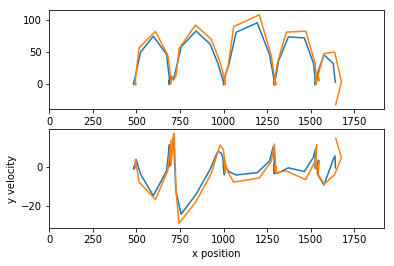

In [160]:
fig,(ax1,ax2) = plt.subplots(2)
ax1.plot(df_frw['x'][list(range(i+1))],np.gradient(df_frw['x'])[list(range(i+1))],label="right wrist")
ax1.plot(df_frf['x'][list(range(i+1))],np.gradient(df_frf['x'])[list(range(i+1))],label="right fingers")
ax2.plot(df_frw['x'][list(range(i+1))],np.gradient(df_frw['y'])[list(range(i+1))],label="right wrist")
ax2.plot(df_frf['x'][list(range(i+1))],np.gradient(df_frf['y'])[list(range(i+1))],label="right fingers")
ax2.set_xlabel("x position")
ax2.set_ylabel("y velocity")
ax1.set_xlim(0,1920)

ax2.set_xlim(0,1920)

In [172]:
#x velocity vs y velocity
videolist = glob.glob("/home/ml/Documents/Not_TADSS_Videos/MC30/cut/dlc_output_16-810/MC30_11-6-2019_R4_*.h5")+glob.glob("/home/ml/Documents/Not_TADSS_Videos/MC30/cut/dlc_output_16-810/MC30_12-02-2019_R1_*.h5")+glob.glob("/home/ml/Documents/Not_TADSS_Videos/MC30/cut/dlc_output_16-810/MC30_12-02-2019_R3_*.h5")+glob.glob("/home/ml/Documents/Not_TADSS_Videos/MC30/cut/dlc_output_16-810/MC30_12-04-2019_R3_*.h5")+glob.glob("/home/ml/Documents/Not_TADSS_Videos/MC30/cut/dlc_output_16-810/MC30_12-03-2019_R2_*.h5")
for f in videolist:
    df = pd.read_hdf(f)
    name=f.split("/")[8]
    if len(name.split("_")) == 9:
        run = name.split("_")[2]
    else:
        run = name.split("_")[3]
    #split by limb
    #frontright
    df_frw = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['right wrist']
    df_frf = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['right fingers']
    df_fre = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['right elbow']
    #frontleft
    df_flw = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['left wrist']
    df_flf = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['left fingers']
    df_fle = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['left elbow']
    #backright
    df_bra = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['right ankle']
    df_brt = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['right toes']
    #frontleft
    df_bla = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['left ankle']
    df_blt = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['left toes']

    #filter by likelihood 

    likelihood_threshold = 0.1

    df_frw.loc[df_frw['likelihood']<likelihood_threshold] = np.nan
    df_frf.loc[df_frf['likelihood']<likelihood_threshold] = np.nan
    df_fre.loc[df_fre['likelihood']<likelihood_threshold] = np.nan
    #frontleft
    df_flw.loc[df_flw['likelihood']<likelihood_threshold] = np.nan
    df_flw.loc[df_flf['likelihood']<likelihood_threshold] = np.nan
    df_fle.loc[df_fle['likelihood']<likelihood_threshold] = np.nan
    #backright
    df_bra.loc[df_bra['likelihood']<likelihood_threshold] = np.nan
    df_brt.loc[df_brt['likelihood']<likelihood_threshold] = np.nan
    #frontleft
    df_bla.loc[df_bla['likelihood']<likelihood_threshold] = np.nan
    df_blt.loc[df_blt['likelihood']<likelihood_threshold] = np.nan

    #forward fill
    #front right
    df_frw = df_frw.ffill()
    df_frf = df_frf.ffill()
    df_fre = df_fre.ffill()
    #frontleft
    df_flw = df_flw.ffill()
    df_flf = df_flw.ffill()
    df_fle = df_fle.ffill()
    #backright
    df_bra = df_bra.ffill()
    df_brt = df_brt.ffill()
    #frontleft
    df_bla = df_bla.ffill()
    df_blt = df_blt.ffill()

    #reset_index
    #front right
    df_frw = df_frw.reset_index(drop=True)
    df_frf = df_frf.reset_index(drop=True)
    df_fre = df_fre.reset_index(drop=True)
    #frontleft
    df_flw = df_flw.reset_index(drop=True)
    df_flf = df_flw.reset_index(drop=True)
    df_fle = df_fle.reset_index(drop=True)
    #backright
    df_bra = df_bra.reset_index(drop=True)
    df_brt = df_brt.reset_index(drop=True)
    #frontleft
    df_bla = df_bla.reset_index(drop=True)
    df_blt = df_blt.reset_index(drop=True)

    #find + and - peaks for all limbs. 

    #front right x
    if list(run)[0]=='L':
        forward_frw_x = find_peaks(-1*np.gradient(df_frw['x']),height=20,distance=5)
        backward_frw_x = find_peaks(np.gradient(df_frw['x']),height=20,distance=5)
    else:
        forward_frw_x = find_peaks(np.gradient(df_frw['x']),height=20,distance=5)
        backward_frw_x = find_peaks(-1*np.gradient(df_frw['x']),height=20,distance=5)
    forwardlist_frw_x = forward_frw_x[0]
    backwardlist_frw_x = backward_frw_x[0]

    if list(run)[0]=='L':
        forward_frf_x = find_peaks(-1*np.gradient(df_frf['x']),height=20,distance=5)
        backward_frf_x = find_peaks(np.gradient(df_frf['x']),height=20,distance=5)
    else:
        forward_frf_x = find_peaks(np.gradient(df_frf['x']),height=20,distance=5)
        backward_frf_x = find_peaks(-1*np.gradient(df_frf['x']),height=20,distance=5)
    forwardlist_frf_x = forward_frf_x[0]
    backwardlist_frf_x = backward_frf_x[0]

    #front right y
    up_frw_y = find_peaks(-1*np.gradient(df_frw['y']),height=5,distance=5)
    down_frw_y = find_peaks(np.gradient(df_frw['y']),height=5,distance=5)
    uplist_frw_y = up_frw_y[0]
    downlist_frw_y = down_frw_y[0]

    up_frf_y = find_peaks(-1*np.gradient(df_frf['y']),height=5,distance=5)
    down_frf_y = find_peaks(np.gradient(df_frf['y']),height=5,distance=5)
    uplist_frf_y = up_frf_y[0]
    downlist_frf_y = down_frf_y[0]

        #front left x
    if list(run)[0]=='L':
        forward_flw_x = find_peaks(-1*np.gradient(df_flw['x']),height=20,distance=5)
        backward_flw_x = find_peaks(np.gradient(df_flw['x']),height=20,distance=5)
    else:
        forward_flw_x = find_peaks(np.gradient(df_flw['x']),height=20,distance=5)
        backward_flw_x = find_peaks(-1*np.gradient(df_flw['x']),height=20,distance=5)
    forwardlist_flw_x = forward_flw_x[0]
    backwardlist_flw_x = backward_flw_x[0]

    if list(run)[0]=='L':
        forward_flf_x = find_peaks(-1*np.gradient(df_flf['x']),height=20,distance=5)
        backward_flf_x = find_peaks(np.gradient(df_flf['x']),height=20,distance=5)
    else:
        forward_flf_x = find_peaks(np.gradient(df_flf['x']),height=20,distance=5)
        backward_flf_x = find_peaks(-1*np.gradient(df_flf['x']),height=20,distance=5)
    forwardlist_flf_x = forward_flf_x[0]
    backwardlist_flf_x = backward_flf_x[0]

    #front left y
    up_flw_y = find_peaks(-1*np.gradient(df_flw['y']),height=5,distance=5)
    down_flw_y = find_peaks(np.gradient(df_flw['y']),height=5,distance=5)
    uplist_flw_y = up_flw_y[0]
    downlist_flw_y = down_flw_y[0]

    up_flf_y = find_peaks(-1*np.gradient(df_flf['y']),height=5,distance=5)
    down_flf_y = find_peaks(np.gradient(df_flf['y']),height=5,distance=5)
    uplist_flf_y = up_flf_y[0]
    downlist_flf_y = down_flf_y[0]

    # back right x
    if list(run)[0]=='L':
        forward_bra_x = find_peaks(-1*np.gradient(df_bra['x']),height=20,distance=5)
        backward_bra_x = find_peaks(np.gradient(df_bra['x']),height=20,distance=5)
    else:
        forward_bra_x = find_peaks(np.gradient(df_bra['x']),height=20,distance=5)
        backward_bra_x = find_peaks(-1*np.gradient(df_bra['x']),height=20,distance=5)
    forwardlist_bra_x = forward_bra_x[0]
    backwardlist_bra_x = backward_bra_x[0]

    if list(run)[0]=='L':
        forward_brt_x = find_peaks(-1*np.gradient(df_brt['x']),height=20,distance=5)
        backward_brt_x = find_peaks(np.gradient(df_brt['x']),height=20,distance=5)
    else:
        forward_brt_x = find_peaks(np.gradient(df_brt['x']),height=20,distance=5)
        backward_brt_x = find_peaks(-1*np.gradient(df_brt['x']),height=20,distance=5)
    forwardlist_brt_x = forward_brt_x[0]
    backwardlist_brt_x = backward_brt_x[0]

    #back right y
    up_bra_y = find_peaks(-1*np.gradient(df_bra['y']),height=5,distance=5)
    down_bra_y = find_peaks(np.gradient(df_bra['y']),height=5,distance=5)
    uplist_bra_y = up_bra_y[0]
    downlist_bra_y = down_bra_y[0]

    up_brt_y = find_peaks(-1*np.gradient(df_brt['y']),height=5,distance=5)
    down_brt_y = find_peaks(np.gradient(df_brt['y']),height=5,distance=5)
    uplist_brt_y = up_brt_y[0]
    downlist_brt_y = down_brt_y[0]

    #back left x
    if list(run)[0]=='L':
        forward_bla_x = find_peaks(-1*np.gradient(df_bla['x']),height=20,distance=5)
        backward_bla_x = find_peaks(np.gradient(df_bla['x']),height=20,distance=5)
    else:
        forward_bla_x = find_peaks(np.gradient(df_bla['x']),height=20,distance=5)
        backward_bla_x = find_peaks(-1*np.gradient(df_bla['x']),height=20,distance=5)
    forwardlist_bla_x = forward_bla_x[0]
    backwardlist_bla_x = backward_bla_x[0]

    if list(run)[0]=='L':
        forward_blt_x = find_peaks(-1*np.gradient(df_blt['x']),height=20,distance=5)
        backward_blt_x = find_peaks(np.gradient(df_blt['x']),height=20,distance=5)
    else:
        forward_blt_x = find_peaks(np.gradient(df_blt['x']),height=20,distance=5)
        backward_blt_x = find_peaks(-1*np.gradient(df_blt['x']),height=20,distance=5)
    forwardlist_blt_x = forward_blt_x[0]
    backwardlist_blt_x = backward_blt_x[0]

    #back left y
    up_bla_y = find_peaks(-1*np.gradient(df_bla['y']),height=5,distance=5)
    down_bla_y = find_peaks(np.gradient(df_bla['y']),height=5,distance=5)
    uplist_bla_y = up_bla_y[0]
    downlist_bla_y = down_bla_y[0]

    up_blt_y = find_peaks(-1*np.gradient(df_blt['y']),height=5,distance=5)
    down_blt_y = find_peaks(np.gradient(df_blt['y']),height=5,distance=5)
    uplist_blt_y = up_blt_y[0]
    downlist_blt_y = down_blt_y[0]


    #plot

    cap = cv2.VideoCapture(f.split(".")[0]+"_labeled.mp4")
    frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    width  = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fig_folder="/home/ml/Documents/"+name.split("_")[0]+"_"+name.split("_")[1]+"_"+name.split("_")[2]+"_vel_fr/"

    for i in range(frames):
        plt.close()
        plt.figure(figsize=(20,10))
        plt.plot(np.gradient(df_frw['x'])[list(range(i+1))],np.gradient(df_frw['y'])[list(range(i+1))])
        plt.plot(np.gradient(df_frf['x'])[list(range(i+1))],np.gradient(df_frf['y'])[list(range(i+1))])
        plt.xlabel("x velocity")
        plt.ylabel("y velocity")
        plt.xlim(np.gradient(df_frw['x']).min()-10,np.gradient(df_frw['x']).max()+10)
        plt.ylim(np.gradient(df_frw['y']).min()-5,np.gradient(df_frw['y']).max()+5)
        fig.tight_layout()
        plt.savefig(fig_folder+str(i).zfill(3)+".png")
        plt.close()
    video = f.split(".")[0]+"_labeled.mp4"
    vel_video = fig_folder+name.split("_")[0]+"_"+name.split("_")[1]+"_"+name.split("_")[2]+"_xy_vel_fr.mp4"
    out_file = fig_folder+name.split("_")[0]+"_"+name.split("_")[1]+"_"+name.split("_")[2]+"_xy_vel_fr_rat.mp4"
    out_file2 = out_file+"_slow.mp4"
    try:
        (
            ffmpeg
            .input(fig_folder+"*.png",pattern_type='glob')
            .output(vel_video,r='24',pix_fmt='yuv420p',s="1440x720")
            .overwrite_output()
            .run(capture_stdout=True, capture_stderr=True)
        )
    except ffmpeg.Error as e:
        print('stdout:', e.stdout.decode('utf8'))
        print('stderr:', e.stderr.decode('utf8'))
        raise e
    subprocess.call(["ffmpeg","-y", "-i", video , "-i", vel_video, "-filter_complex", "[1][0]scale2ref[2nd][ref];[ref][2nd]vstack", out_file])    
    subprocess.call(['ffmpeg',"-y",'-i',out_file,"-filter:v", 'setpts=8*PTS',out_file2]) 

In [179]:
#x and y acceleration vs frame
videolist = glob.glob("/home/ml/Documents/Not_TADSS_Videos/MC30/cut/dlc_output_16-810/MC30_11-6-2019_R4_*.h5")+glob.glob("/home/ml/Documents/Not_TADSS_Videos/MC30/cut/dlc_output_16-810/MC30_12-02-2019_R1_*.h5")+glob.glob("/home/ml/Documents/Not_TADSS_Videos/MC30/cut/dlc_output_16-810/MC30_12-02-2019_R3_*.h5")+glob.glob("/home/ml/Documents/Not_TADSS_Videos/MC30/cut/dlc_output_16-810/MC30_12-04-2019_R3_*.h5")+glob.glob("/home/ml/Documents/Not_TADSS_Videos/MC30/cut/dlc_output_16-810/MC30_12-03-2019_R2_*.h5")
for f in videolist:
    df = pd.read_hdf(f)
    name=f.split("/")[8]
    if len(name.split("_")) == 9:
        run = name.split("_")[2]
    else:
        run = name.split("_")[3]
    #split by limb
    #frontright
    df_frw = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['right wrist']
    df_frf = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['right fingers']
    df_fre = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['right elbow']
    #frontleft
    df_flw = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['left wrist']
    df_flf = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['left fingers']
    df_fle = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['left elbow']
    #backright
    df_bra = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['right ankle']
    df_brt = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['right toes']
    #frontleft
    df_bla = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['left ankle']
    df_blt = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['left toes']

    #filter by likelihood 

    likelihood_threshold = 0.1

    df_frw.loc[df_frw['likelihood']<likelihood_threshold] = np.nan
    df_frf.loc[df_frf['likelihood']<likelihood_threshold] = np.nan
    df_fre.loc[df_fre['likelihood']<likelihood_threshold] = np.nan
    #frontleft
    df_flw.loc[df_flw['likelihood']<likelihood_threshold] = np.nan
    df_flw.loc[df_flf['likelihood']<likelihood_threshold] = np.nan
    df_fle.loc[df_fle['likelihood']<likelihood_threshold] = np.nan
    #backright
    df_bra.loc[df_bra['likelihood']<likelihood_threshold] = np.nan
    df_brt.loc[df_brt['likelihood']<likelihood_threshold] = np.nan
    #frontleft
    df_bla.loc[df_bla['likelihood']<likelihood_threshold] = np.nan
    df_blt.loc[df_blt['likelihood']<likelihood_threshold] = np.nan

    #forward fill
    #front right
    df_frw = df_frw.ffill()
    df_frf = df_frf.ffill()
    df_fre = df_fre.ffill()
    #frontleft
    df_flw = df_flw.ffill()
    df_flf = df_flw.ffill()
    df_fle = df_fle.ffill()
    #backright
    df_bra = df_bra.ffill()
    df_brt = df_brt.ffill()
    #frontleft
    df_bla = df_bla.ffill()
    df_blt = df_blt.ffill()

    #reset_index
    #front right
    df_frw = df_frw.reset_index(drop=True)
    df_frf = df_frf.reset_index(drop=True)
    df_fre = df_fre.reset_index(drop=True)
    #frontleft
    df_flw = df_flw.reset_index(drop=True)
    df_flf = df_flw.reset_index(drop=True)
    df_fle = df_fle.reset_index(drop=True)
    #backright
    df_bra = df_bra.reset_index(drop=True)
    df_brt = df_brt.reset_index(drop=True)
    #frontleft
    df_bla = df_bla.reset_index(drop=True)
    df_blt = df_blt.reset_index(drop=True)

    #find + and - peaks for all limbs. 

    #front right x
    if list(run)[0]=='L':
        forward_frw_x = find_peaks(-1*np.gradient(df_frw['x']),height=20,distance=5)
        backward_frw_x = find_peaks(np.gradient(df_frw['x']),height=20,distance=5)
    else:
        forward_frw_x = find_peaks(np.gradient(df_frw['x']),height=20,distance=5)
        backward_frw_x = find_peaks(-1*np.gradient(df_frw['x']),height=20,distance=5)
    forwardlist_frw_x = forward_frw_x[0]
    backwardlist_frw_x = backward_frw_x[0]

    if list(run)[0]=='L':
        forward_frf_x = find_peaks(-1*np.gradient(df_frf['x']),height=20,distance=5)
        backward_frf_x = find_peaks(np.gradient(df_frf['x']),height=20,distance=5)
    else:
        forward_frf_x = find_peaks(np.gradient(df_frf['x']),height=20,distance=5)
        backward_frf_x = find_peaks(-1*np.gradient(df_frf['x']),height=20,distance=5)
    forwardlist_frf_x = forward_frf_x[0]
    backwardlist_frf_x = backward_frf_x[0]

    #front right y
    up_frw_y = find_peaks(-1*np.gradient(df_frw['y']),height=5,distance=5)
    down_frw_y = find_peaks(np.gradient(df_frw['y']),height=5,distance=5)
    uplist_frw_y = up_frw_y[0]
    downlist_frw_y = down_frw_y[0]

    up_frf_y = find_peaks(-1*np.gradient(df_frf['y']),height=5,distance=5)
    down_frf_y = find_peaks(np.gradient(df_frf['y']),height=5,distance=5)
    uplist_frf_y = up_frf_y[0]
    downlist_frf_y = down_frf_y[0]

        #front left x
    if list(run)[0]=='L':
        forward_flw_x = find_peaks(-1*np.gradient(df_flw['x']),height=20,distance=5)
        backward_flw_x = find_peaks(np.gradient(df_flw['x']),height=20,distance=5)
    else:
        forward_flw_x = find_peaks(np.gradient(df_flw['x']),height=20,distance=5)
        backward_flw_x = find_peaks(-1*np.gradient(df_flw['x']),height=20,distance=5)
    forwardlist_flw_x = forward_flw_x[0]
    backwardlist_flw_x = backward_flw_x[0]

    if list(run)[0]=='L':
        forward_flf_x = find_peaks(-1*np.gradient(df_flf['x']),height=20,distance=5)
        backward_flf_x = find_peaks(np.gradient(df_flf['x']),height=20,distance=5)
    else:
        forward_flf_x = find_peaks(np.gradient(df_flf['x']),height=20,distance=5)
        backward_flf_x = find_peaks(-1*np.gradient(df_flf['x']),height=20,distance=5)
    forwardlist_flf_x = forward_flf_x[0]
    backwardlist_flf_x = backward_flf_x[0]

    #front left y
    up_flw_y = find_peaks(-1*np.gradient(df_flw['y']),height=5,distance=5)
    down_flw_y = find_peaks(np.gradient(df_flw['y']),height=5,distance=5)
    uplist_flw_y = up_flw_y[0]
    downlist_flw_y = down_flw_y[0]

    up_flf_y = find_peaks(-1*np.gradient(df_flf['y']),height=5,distance=5)
    down_flf_y = find_peaks(np.gradient(df_flf['y']),height=5,distance=5)
    uplist_flf_y = up_flf_y[0]
    downlist_flf_y = down_flf_y[0]

    # back right x
    if list(run)[0]=='L':
        forward_bra_x = find_peaks(-1*np.gradient(df_bra['x']),height=20,distance=5)
        backward_bra_x = find_peaks(np.gradient(df_bra['x']),height=20,distance=5)
    else:
        forward_bra_x = find_peaks(np.gradient(df_bra['x']),height=20,distance=5)
        backward_bra_x = find_peaks(-1*np.gradient(df_bra['x']),height=20,distance=5)
    forwardlist_bra_x = forward_bra_x[0]
    backwardlist_bra_x = backward_bra_x[0]

    if list(run)[0]=='L':
        forward_brt_x = find_peaks(-1*np.gradient(df_brt['x']),height=20,distance=5)
        backward_brt_x = find_peaks(np.gradient(df_brt['x']),height=20,distance=5)
    else:
        forward_brt_x = find_peaks(np.gradient(df_brt['x']),height=20,distance=5)
        backward_brt_x = find_peaks(-1*np.gradient(df_brt['x']),height=20,distance=5)
    forwardlist_brt_x = forward_brt_x[0]
    backwardlist_brt_x = backward_brt_x[0]

    #back right y
    up_bra_y = find_peaks(-1*np.gradient(df_bra['y']),height=5,distance=5)
    down_bra_y = find_peaks(np.gradient(df_bra['y']),height=5,distance=5)
    uplist_bra_y = up_bra_y[0]
    downlist_bra_y = down_bra_y[0]

    up_brt_y = find_peaks(-1*np.gradient(df_brt['y']),height=5,distance=5)
    down_brt_y = find_peaks(np.gradient(df_brt['y']),height=5,distance=5)
    uplist_brt_y = up_brt_y[0]
    downlist_brt_y = down_brt_y[0]

    #back left x
    if list(run)[0]=='L':
        forward_bla_x = find_peaks(-1*np.gradient(df_bla['x']),height=20,distance=5)
        backward_bla_x = find_peaks(np.gradient(df_bla['x']),height=20,distance=5)
    else:
        forward_bla_x = find_peaks(np.gradient(df_bla['x']),height=20,distance=5)
        backward_bla_x = find_peaks(-1*np.gradient(df_bla['x']),height=20,distance=5)
    forwardlist_bla_x = forward_bla_x[0]
    backwardlist_bla_x = backward_bla_x[0]

    if list(run)[0]=='L':
        forward_blt_x = find_peaks(-1*np.gradient(df_blt['x']),height=20,distance=5)
        backward_blt_x = find_peaks(np.gradient(df_blt['x']),height=20,distance=5)
    else:
        forward_blt_x = find_peaks(np.gradient(df_blt['x']),height=20,distance=5)
        backward_blt_x = find_peaks(-1*np.gradient(df_blt['x']),height=20,distance=5)
    forwardlist_blt_x = forward_blt_x[0]
    backwardlist_blt_x = backward_blt_x[0]

    #back left y
    up_bla_y = find_peaks(-1*np.gradient(df_bla['y']),height=5,distance=5)
    down_bla_y = find_peaks(np.gradient(df_bla['y']),height=5,distance=5)
    uplist_bla_y = up_bla_y[0]
    downlist_bla_y = down_bla_y[0]

    up_blt_y = find_peaks(-1*np.gradient(df_blt['y']),height=5,distance=5)
    down_blt_y = find_peaks(np.gradient(df_blt['y']),height=5,distance=5)
    uplist_blt_y = up_blt_y[0]
    downlist_blt_y = down_blt_y[0]


    #plot

    cap = cv2.VideoCapture(f.split(".")[0]+"_labeled.mp4")
    frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    width  = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    
    fig_folder="/home/ml/Documents/"+name.split("_")[0]+"_"+name.split("_")[1]+"_"+name.split("_")[2]+"_accel_fr/"

    for i in range(frames):
        plt.close()
        plt.figure(figsize=(20,10))
        fig,(ax1,ax2) = plt.subplots(2)
        ax1.plot(np.gradient(np.gradient(df_frw['x']))[list(range(i+1))],label="right wrist")
        ax1.plot(np.gradient(np.gradient(df_frf['x']))[list(range(i+1))],label="right fingers")
        ax1.set_ylabel("x acceleration")
        ax2.plot(np.gradient(df_frw['y'])[list(range(i+1))],label="right wrist")
        ax2.plot(np.gradient(df_frf['y'])[list(range(i+1))],label="right fingers")
        ax2.set_ylabel("y acceleration")
        ax1.set_xlim(0,frames)
        ax2.set_xlim(0,frames)
        fig.tight_layout()
        plt.savefig(fig_folder+str(i).zfill(3)+".png")
        plt.close()
    video = f.split(".")[0]+"_labeled.mp4"
    vel_video = fig_folder+name.split("_")[0]+"_"+name.split("_")[1]+"_"+name.split("_")[2]+"_accel_fr.mp4"
    out_file = fig_folder+name.split("_")[0]+"_"+name.split("_")[1]+"_"+name.split("_")[2]+"_accel_fr_rat.mp4"
    out_file2 = out_file+"_slow.mp4"
    try:
        (
            ffmpeg
            .input(fig_folder+"*.png",pattern_type='glob')
            .output(vel_video,r='24',pix_fmt='yuv420p',s="1440x720")
            .overwrite_output()
            .run(capture_stdout=True, capture_stderr=True)
        )
    except ffmpeg.Error as e:
        print('stdout:', e.stdout.decode('utf8'))
        print('stderr:', e.stderr.decode('utf8'))
        raise e
    subprocess.call(["ffmpeg","-y", "-i", video , "-i", vel_video, "-filter_complex", "[1][0]scale2ref[2nd][ref];[ref][2nd]vstack", out_file])    
    subprocess.call(['ffmpeg',"-y",'-i',out_file,"-filter:v", 'setpts=8*PTS',out_file2]) 

<Figure size 1440x720 with 0 Axes>

In [178]:
# x and y velocity vs y position
videolist = glob.glob("/home/ml/Documents/Not_TADSS_Videos/MC30/cut/dlc_output_16-810/MC30_11-6-2019_R4_*.h5")+glob.glob("/home/ml/Documents/Not_TADSS_Videos/MC30/cut/dlc_output_16-810/MC30_12-02-2019_R1_*.h5")+glob.glob("/home/ml/Documents/Not_TADSS_Videos/MC30/cut/dlc_output_16-810/MC30_12-02-2019_R3_*.h5")+glob.glob("/home/ml/Documents/Not_TADSS_Videos/MC30/cut/dlc_output_16-810/MC30_12-04-2019_R3_*.h5")+glob.glob("/home/ml/Documents/Not_TADSS_Videos/MC30/cut/dlc_output_16-810/MC30_12-03-2019_R2_*.h5")
for f in videolist:
    df = pd.read_hdf(f)
    name=f.split("/")[8]
    if len(name.split("_")) == 9:
        run = name.split("_")[2]
    else:
        run = name.split("_")[3]
    #split by limb
    #frontright
    df_frw = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['right wrist']
    df_frf = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['right fingers']
    df_fre = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['right elbow']
    #frontleft
    df_flw = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['left wrist']
    df_flf = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['left fingers']
    df_fle = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['left elbow']
    #backright
    df_bra = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['right ankle']
    df_brt = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['right toes']
    #frontleft
    df_bla = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['left ankle']
    df_blt = df['DLC_resnet101_LadderWalkFeb13shuffle1_1030000']['left toes']

    #filter by likelihood 

    likelihood_threshold = 0.1

    df_frw.loc[df_frw['likelihood']<likelihood_threshold] = np.nan
    df_frf.loc[df_frf['likelihood']<likelihood_threshold] = np.nan
    df_fre.loc[df_fre['likelihood']<likelihood_threshold] = np.nan
    #frontleft
    df_flw.loc[df_flw['likelihood']<likelihood_threshold] = np.nan
    df_flw.loc[df_flf['likelihood']<likelihood_threshold] = np.nan
    df_fle.loc[df_fle['likelihood']<likelihood_threshold] = np.nan
    #backright
    df_bra.loc[df_bra['likelihood']<likelihood_threshold] = np.nan
    df_brt.loc[df_brt['likelihood']<likelihood_threshold] = np.nan
    #frontleft
    df_bla.loc[df_bla['likelihood']<likelihood_threshold] = np.nan
    df_blt.loc[df_blt['likelihood']<likelihood_threshold] = np.nan

    #forward fill
    #front right
    df_frw = df_frw.ffill()
    df_frf = df_frf.ffill()
    df_fre = df_fre.ffill()
    #frontleft
    df_flw = df_flw.ffill()
    df_flf = df_flw.ffill()
    df_fle = df_fle.ffill()
    #backright
    df_bra = df_bra.ffill()
    df_brt = df_brt.ffill()
    #frontleft
    df_bla = df_bla.ffill()
    df_blt = df_blt.ffill()

    #reset_index
    #front right
    df_frw = df_frw.reset_index(drop=True)
    df_frf = df_frf.reset_index(drop=True)
    df_fre = df_fre.reset_index(drop=True)
    #frontleft
    df_flw = df_flw.reset_index(drop=True)
    df_flf = df_flw.reset_index(drop=True)
    df_fle = df_fle.reset_index(drop=True)
    #backright
    df_bra = df_bra.reset_index(drop=True)
    df_brt = df_brt.reset_index(drop=True)
    #frontleft
    df_bla = df_bla.reset_index(drop=True)
    df_blt = df_blt.reset_index(drop=True)

    #find + and - peaks for all limbs. 

    #front right x
    if list(run)[0]=='L':
        forward_frw_x = find_peaks(-1*np.gradient(df_frw['x']),height=20,distance=5)
        backward_frw_x = find_peaks(np.gradient(df_frw['x']),height=20,distance=5)
    else:
        forward_frw_x = find_peaks(np.gradient(df_frw['x']),height=20,distance=5)
        backward_frw_x = find_peaks(-1*np.gradient(df_frw['x']),height=20,distance=5)
    forwardlist_frw_x = forward_frw_x[0]
    backwardlist_frw_x = backward_frw_x[0]

    if list(run)[0]=='L':
        forward_frf_x = find_peaks(-1*np.gradient(df_frf['x']),height=20,distance=5)
        backward_frf_x = find_peaks(np.gradient(df_frf['x']),height=20,distance=5)
    else:
        forward_frf_x = find_peaks(np.gradient(df_frf['x']),height=20,distance=5)
        backward_frf_x = find_peaks(-1*np.gradient(df_frf['x']),height=20,distance=5)
    forwardlist_frf_x = forward_frf_x[0]
    backwardlist_frf_x = backward_frf_x[0]

    #front right y
    up_frw_y = find_peaks(-1*np.gradient(df_frw['y']),height=5,distance=5)
    down_frw_y = find_peaks(np.gradient(df_frw['y']),height=5,distance=5)
    uplist_frw_y = up_frw_y[0]
    downlist_frw_y = down_frw_y[0]

    up_frf_y = find_peaks(-1*np.gradient(df_frf['y']),height=5,distance=5)
    down_frf_y = find_peaks(np.gradient(df_frf['y']),height=5,distance=5)
    uplist_frf_y = up_frf_y[0]
    downlist_frf_y = down_frf_y[0]

        #front left x
    if list(run)[0]=='L':
        forward_flw_x = find_peaks(-1*np.gradient(df_flw['x']),height=20,distance=5)
        backward_flw_x = find_peaks(np.gradient(df_flw['x']),height=20,distance=5)
    else:
        forward_flw_x = find_peaks(np.gradient(df_flw['x']),height=20,distance=5)
        backward_flw_x = find_peaks(-1*np.gradient(df_flw['x']),height=20,distance=5)
    forwardlist_flw_x = forward_flw_x[0]
    backwardlist_flw_x = backward_flw_x[0]

    if list(run)[0]=='L':
        forward_flf_x = find_peaks(-1*np.gradient(df_flf['x']),height=20,distance=5)
        backward_flf_x = find_peaks(np.gradient(df_flf['x']),height=20,distance=5)
    else:
        forward_flf_x = find_peaks(np.gradient(df_flf['x']),height=20,distance=5)
        backward_flf_x = find_peaks(-1*np.gradient(df_flf['x']),height=20,distance=5)
    forwardlist_flf_x = forward_flf_x[0]
    backwardlist_flf_x = backward_flf_x[0]

    #front left y
    up_flw_y = find_peaks(-1*np.gradient(df_flw['y']),height=5,distance=5)
    down_flw_y = find_peaks(np.gradient(df_flw['y']),height=5,distance=5)
    uplist_flw_y = up_flw_y[0]
    downlist_flw_y = down_flw_y[0]

    up_flf_y = find_peaks(-1*np.gradient(df_flf['y']),height=5,distance=5)
    down_flf_y = find_peaks(np.gradient(df_flf['y']),height=5,distance=5)
    uplist_flf_y = up_flf_y[0]
    downlist_flf_y = down_flf_y[0]

    # back right x
    if list(run)[0]=='L':
        forward_bra_x = find_peaks(-1*np.gradient(df_bra['x']),height=20,distance=5)
        backward_bra_x = find_peaks(np.gradient(df_bra['x']),height=20,distance=5)
    else:
        forward_bra_x = find_peaks(np.gradient(df_bra['x']),height=20,distance=5)
        backward_bra_x = find_peaks(-1*np.gradient(df_bra['x']),height=20,distance=5)
    forwardlist_bra_x = forward_bra_x[0]
    backwardlist_bra_x = backward_bra_x[0]

    if list(run)[0]=='L':
        forward_brt_x = find_peaks(-1*np.gradient(df_brt['x']),height=20,distance=5)
        backward_brt_x = find_peaks(np.gradient(df_brt['x']),height=20,distance=5)
    else:
        forward_brt_x = find_peaks(np.gradient(df_brt['x']),height=20,distance=5)
        backward_brt_x = find_peaks(-1*np.gradient(df_brt['x']),height=20,distance=5)
    forwardlist_brt_x = forward_brt_x[0]
    backwardlist_brt_x = backward_brt_x[0]

    #back right y
    up_bra_y = find_peaks(-1*np.gradient(df_bra['y']),height=5,distance=5)
    down_bra_y = find_peaks(np.gradient(df_bra['y']),height=5,distance=5)
    uplist_bra_y = up_bra_y[0]
    downlist_bra_y = down_bra_y[0]

    up_brt_y = find_peaks(-1*np.gradient(df_brt['y']),height=5,distance=5)
    down_brt_y = find_peaks(np.gradient(df_brt['y']),height=5,distance=5)
    uplist_brt_y = up_brt_y[0]
    downlist_brt_y = down_brt_y[0]

    #back left x
    if list(run)[0]=='L':
        forward_bla_x = find_peaks(-1*np.gradient(df_bla['x']),height=20,distance=5)
        backward_bla_x = find_peaks(np.gradient(df_bla['x']),height=20,distance=5)
    else:
        forward_bla_x = find_peaks(np.gradient(df_bla['x']),height=20,distance=5)
        backward_bla_x = find_peaks(-1*np.gradient(df_bla['x']),height=20,distance=5)
    forwardlist_bla_x = forward_bla_x[0]
    backwardlist_bla_x = backward_bla_x[0]

    if list(run)[0]=='L':
        forward_blt_x = find_peaks(-1*np.gradient(df_blt['x']),height=20,distance=5)
        backward_blt_x = find_peaks(np.gradient(df_blt['x']),height=20,distance=5)
    else:
        forward_blt_x = find_peaks(np.gradient(df_blt['x']),height=20,distance=5)
        backward_blt_x = find_peaks(-1*np.gradient(df_blt['x']),height=20,distance=5)
    forwardlist_blt_x = forward_blt_x[0]
    backwardlist_blt_x = backward_blt_x[0]

    #back left y
    up_bla_y = find_peaks(-1*np.gradient(df_bla['y']),height=5,distance=5)
    down_bla_y = find_peaks(np.gradient(df_bla['y']),height=5,distance=5)
    uplist_bla_y = up_bla_y[0]
    downlist_bla_y = down_bla_y[0]

    up_blt_y = find_peaks(-1*np.gradient(df_blt['y']),height=5,distance=5)
    down_blt_y = find_peaks(np.gradient(df_blt['y']),height=5,distance=5)
    uplist_blt_y = up_blt_y[0]
    downlist_blt_y = down_blt_y[0]


    #plot

    cap = cv2.VideoCapture(f.split(".")[0]+"_labeled.mp4")
    frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    width  = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fig_folder="/home/ml/Documents/"+name.split("_")[0]+"_"+name.split("_")[1]+"_"+name.split("_")[2]+"_velypos_fr/"

    for i in range(frames):
        plt.close()
        plt.figure(figsize=(20,10))
        fig,(ax1,ax2) = plt.subplots(1,2)
        ax1.plot(df_frw['y'][list(range(i+1))],np.gradient(df_frw['x'])[list(range(i+1))],label="right wrist")
        ax1.plot(df_frf['y'][list(range(i+1))],np.gradient(df_frf['x'])[list(range(i+1))],label="right fingers")
        ax1.set_ylabel("x velocity")
        ax2.plot(df_frw['y'][list(range(i+1))],np.gradient(df_frw['y'])[list(range(i+1))],label="right wrist")
        ax2.plot(df_frf['y'][list(range(i+1))],np.gradient(df_frf['y'])[list(range(i+1))],label="right fingers")
        ax2.set_xlabel("y position")
        ax2.set_ylabel("y velocity")
        ax1.set_xlim(df_frw['y'].min()-20,df_frw['y'].max()+20)
        ax2.set_xlim(df_frw['y'].min()-20,df_frw['y'].max()+20)
        fig.tight_layout()
        plt.savefig(fig_folder+str(i).zfill(3)+".png")
        plt.close()
    video = f.split(".")[0]+"_labeled.mp4"
    vel_video = fig_folder+name.split("_")[0]+"_"+name.split("_")[1]+"_"+name.split("_")[2]+"_xy_velypos_fr.mp4"
    out_file = fig_folder+name.split("_")[0]+"_"+name.split("_")[1]+"_"+name.split("_")[2]+"_xy_velypos_fr_rat.mp4"
    out_file2 = out_file+"_slow.mp4"
    try:
        (
            ffmpeg
            .input(fig_folder+"*.png",pattern_type='glob')
            .output(vel_video,r='24',pix_fmt='yuv420p',s="1440x720")
            .overwrite_output()
            .run(capture_stdout=True, capture_stderr=True)
        )
    except ffmpeg.Error as e:
        print('stdout:', e.stdout.decode('utf8'))
        print('stderr:', e.stderr.decode('utf8'))
        raise e
    subprocess.call(["ffmpeg","-y", "-i", video , "-i", vel_video, "-filter_complex", "[1][0]scale2ref[2nd][ref];[ref][2nd]vstack", out_file])    
    subprocess.call(['ffmpeg',"-y",'-i',out_file,"-filter:v", 'setpts=8*PTS',out_file2]) 

<Figure size 1440x720 with 0 Axes>